# Goal: To Show the Effect that Overfitting and Unfitting have on Variance and Bias

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

The Sine function was chosen as the model which we would like to predict

In [2]:
def f(x):
    return np.sin(2 * np.pi * x)

1 million points were generated around the Sine function. Then a random number generator was used to randomly select 50 points. A visual representation of this can be seen below in Fig 1.0 and Fig 1.1. 

Linear Regression was chosen as the predictor of the Sine function as this will clearly underfit the data. This predictor function f(x) was run for 1000 iterations each with newly selected test data of 50 points. The result of these 1000 liner predictions f(x) where x = {0,1,2....,999} are shown in Fig 1.2. 

In [3]:
np.random.seed(56)
n_samples = 1000000
x_plot = np.linspace(0, 1, 100)
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis] 
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis] 
y_intercept_list = []
slope_list = []
g_x_list = []
y_pred_list = []
y_train_list = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99995)
    model = LinearRegression().fit(X_train, y_train)
    y_intercept = model.intercept_[0]
    slope = model.coef_[0]
    y_intercept_list.append(y_intercept)
    slope_list.append(slope)
    g_x = slope * x_plot + y_intercept
    g_x_list.append(g_x)
    y_pred = model.predict(X_train)
    y_pred_list.append(y_pred)
    y_train_list.append(y_train)
    

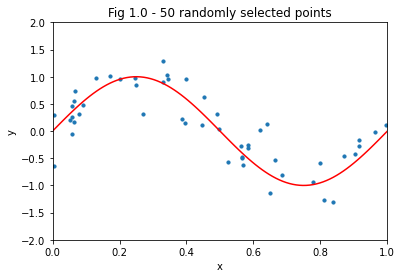

In [4]:
x_plot = np.linspace(0, 1, 100)
ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='red')
ax.scatter(X_train, y_train, s=10)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Fig 1.0 - 50 randomly selected points')
plt.show()

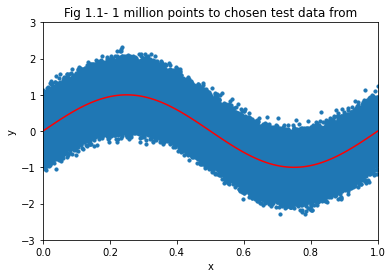

In [5]:
x_plot = np.linspace(0, 1, 100)
ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='red')
ax.scatter(X_test, y_test, s=10)
ax.set_ylim((-3, 3))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Fig 1.1- 1 million points to chosen test data from')
plt.show()

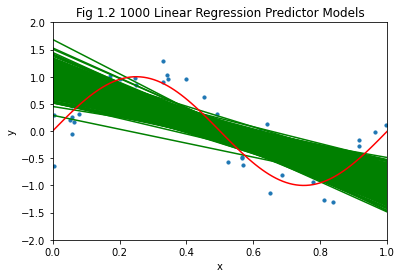

In [6]:
ax = plt.gca()
for i in g_x_list:
    ax.plot(x_plot,i, color='green')
    
ax.scatter(X_train, y_train, s=10)
ax.plot(x_plot, f(x_plot), color='red')


ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Fig 1.2 1000 Linear Regression Predictor Models')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99995)

A polynomial of degree 10 was chosen as the preditor to overfit the data. The graph of these 1000 models are shown in Fig 1.3

In [8]:
y_intercept_polynomial_list = []
coefs_polynomial_list = []
g_x_polynomial_list = []
y_pred_polynomial_list = []
y_train_polynomial_list = []
x_train_polynomial_list = []
degree = 10

for j in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99995)
    x_ = PolynomialFeatures(degree, include_bias=False).fit_transform(X_train)
    model = LinearRegression().fit(x_, y_train)
    y_intercept = model.intercept_[0]
    coefs = model.coef_
    y_pred = model.predict(x_)
    y_intercept_polynomial_list.append(y_intercept)
    coefs_polynomial_list.append(coefs)
    y_pred_polynomial_list.append(y_pred)
    y_train_polynomial_list.append(y_train)
    x_train_polynomial_list.append(X_train)


In [9]:
import numpy as np
from matplotlib import pyplot as plt

def PolyCoefficients(x, coeffs, degree):
    y = 0
    for i in range(degree):
        y += coeffs[i]*x**i
    return y

y_all_list = []
for m in range(100):
    y_list = []
    for l in range(100):
        x_p = x_plot[l]
        y_values = PolyCoefficients(x_p, coefs_polynomial_list[m][0], degree)
        y_list.append(y_values)
        y_all_list.append(y_list)


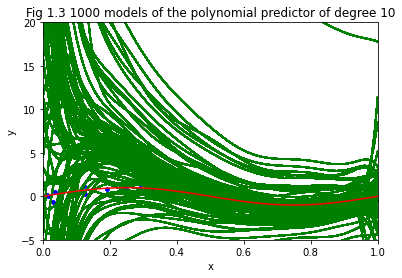

In [10]:
ax = plt.gca()
for n in y_all_list:
    ax.plot(x_plot, n, color='green')
    
ax.plot(x_plot, f(x_plot), color='red')
ax.scatter(X_train, y_train, s=15, color='blue')

ax.set_ylim((-5, 20))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Fig 1.3 1000 models of the polynomial predictor of degree 10')
plt.show()

The sun squared error, the variance and the bias are computed below for the linear regression models and the polynomial of order 10 models. The results of which can be seen below.

In [11]:
SSE_list = []
Variance_list = []
Bias_list = []
for i in range(1000):
    SSE = np.mean((np.mean(y_pred_list[i]) - y_train_list[i])** 2) 
    Variance = np.var(y_pred_list[i]) 
    Bias = SSE - Variance
    SSE_list.append(SSE)
    Variance_list.append(Variance)
    Bias_list.append(Bias)
    

In [12]:
SSE_polynomial_list = []
Variance_polynomial_list = []
Bias_polynomial_list = []
for i in range(1000):
    SSE = np.mean((np.mean(y_pred_polynomial_list[i]) - y_train_polynomial_list[i])** 2) 
    Variance = np.var(y_pred_polynomial_list[i]) 
    Bias = SSE - Variance
    SSE_polynomial_list.append(SSE)
    Variance_polynomial_list.append(Variance)
    Bias_polynomial_list.append(Bias)

The bias measures the distortion of an estimate. The linear regression model is represented by the blue dots and the polynomial of order 10 is represented by the red dots.

It is clear that a linear regression cannot capture the complexity of the Sine function and underfits the data. This gives it a high bias in comparision to the polynomial of order 10 which has little bias as it greatly overfits the data.

The mean bias of the linear regression is  0.27586501344444864 
 while the mean bias of the polynomial of order 10 is  0.06967369931498046


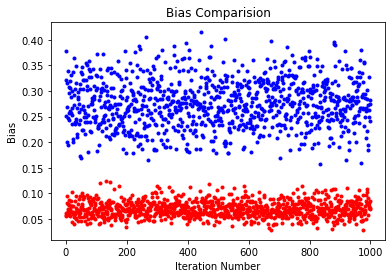

In [13]:
plt.title('Bias Comparision')
plt.plot(Bias_list,'.', color='blue'); 
plt.plot(Bias_polynomial_list, '.',color='red', ); 
plt.xlabel("Iteration Number")
plt.ylabel("Bias")

print('The mean bias of the linear regression is ',np.mean(Bias_list), '\n while the mean bias of the polynomial of order 10 is ', np.mean(Bias_polynomial_list))

It can also be seen that overfitting the data causes a high variance while underfitting the data causes a lower variance as seen below.

The mean variance of the linear regression is  0.30599270842377924 
 while the mean variance of the polynomial of order 10 is  0.5058681103237923


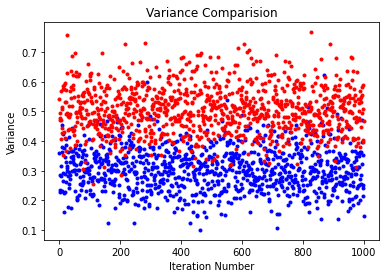

In [14]:
plt.title('Variance Comparision')

plt.plot(Variance_list, '.',color='blue');
plt.plot(Variance_polynomial_list, '.' ,color='red');
plt.xlabel("Iteration Number")
plt.ylabel("Variance")
print('The mean variance of the linear regression is ',np.mean(Variance_list), '\n while the mean variance of the polynomial of order 10 is ', np.mean(Variance_polynomial_list))